## Credit card Fraud Detection (Handling Imbalanced dataset using ML)

In [1]:
import pandas as pd
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [32]:
#check for missing values 
missing_values = df.isnull().sum()
print(missing_values)

# remove duplicate
df.drop_duplicates(inplace=True)
print(df.head())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -

# EDA

Exploratory Data Analysis (EDA) is a crucial step in any data analysis project because it helps to uncover patterns, trends, and relationships in the data. In the context of credit card fraud detection, EDA plays a critical role in understanding the characteristics of fraudulent and non-fraudulent transactions, which can be used to develop a more accurate fraud detection model.

The EDA process starts with data collection and cleaning, where we ensure that the data is complete, accurate, and free from errors. After that, we use data visualization techniques such as histograms, scatter plots, and box plots to gain insights into the data's distribution and identify any outliers. These visualizations help us to understand the relationships between different variables and identify any patterns or trends in the data.

Descriptive statistics are also used during the EDA process to summarize the data and calculate essential metrics such as the mean, median, and standard deviation. These statistics can be used to identify any unusual data points or trends that may require further investigation.

Feature engineering is another important step in EDA, where we create new features from the existing data to improve the machine learning model's performance. For example, we can calculate the time between transactions or the total amount spent per day to create new features that capture more information about the transactions.

Correlation analysis helps us to identify the relationship between different variables in the dataset. This step is essential because it helps us to understand which features are most important in predicting whether a transaction is fraudulent or not. Outlier detection techniques can be used to identify and remove any unusual data points that may be skewing the data, while feature selection techniques can help us to identify the most important features for predicting the target variable.

Finally, after completing the EDA process, we can develop a machine learning model that can accurately predict whether a credit card transaction is fraudulent or not. In this project, we will focus on the EDA part of the credit card fraud detection project to explore and understand the data, which can help us to develop a more accurate and reliable fraud detection model.

In [33]:
df.shape

(283726, 31)

In [34]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [35]:
import matplotlib.pyplot as plt

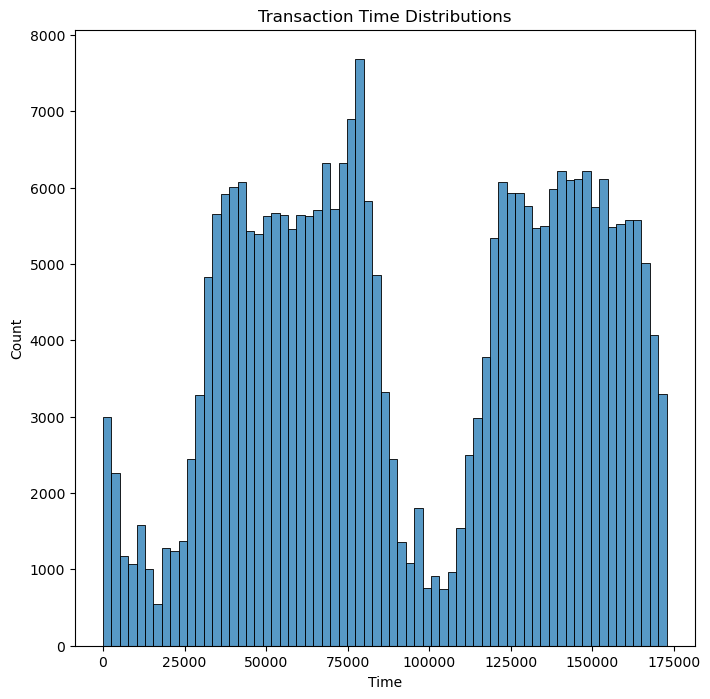

In [36]:
plt.figure(figsize=(8,8))
plt.title('Transaction Time Distributions')
sns.histplot(df['Time'])
plt.show()

<Axes: xlabel='Class', ylabel='count'>

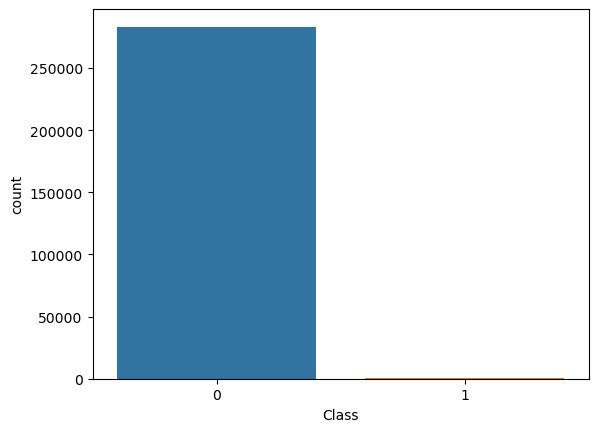

In [37]:
df.Class.value_counts()

sns.countplot(x="Class", data=df)

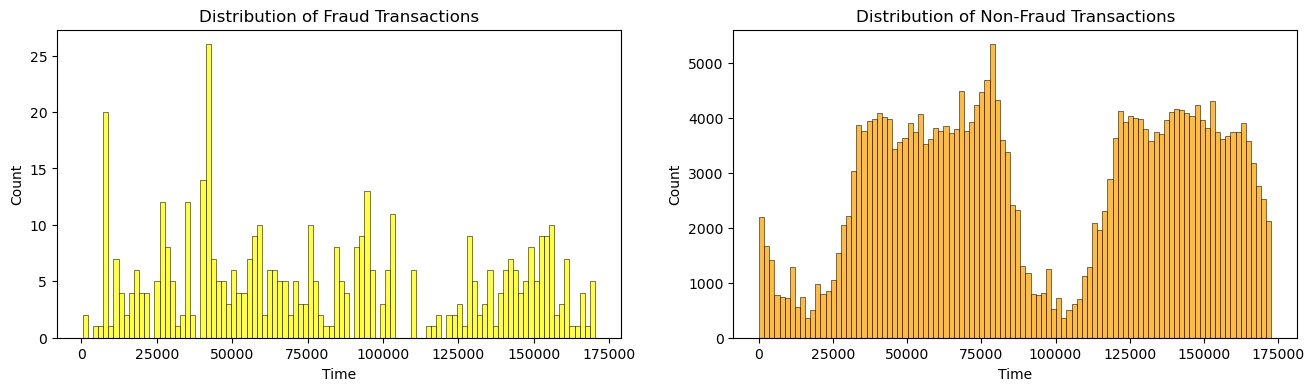

In [38]:
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.histplot(df[(df['Class'] == 1)]['Time'],bins=100,color='yellow', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.histplot(df[(df['Class'] == 0)]['Time'], bins=100,color='orange', ax=axs[1])
axs[1].set_title("Distribution of Non-Fraud Transactions")

plt.show()

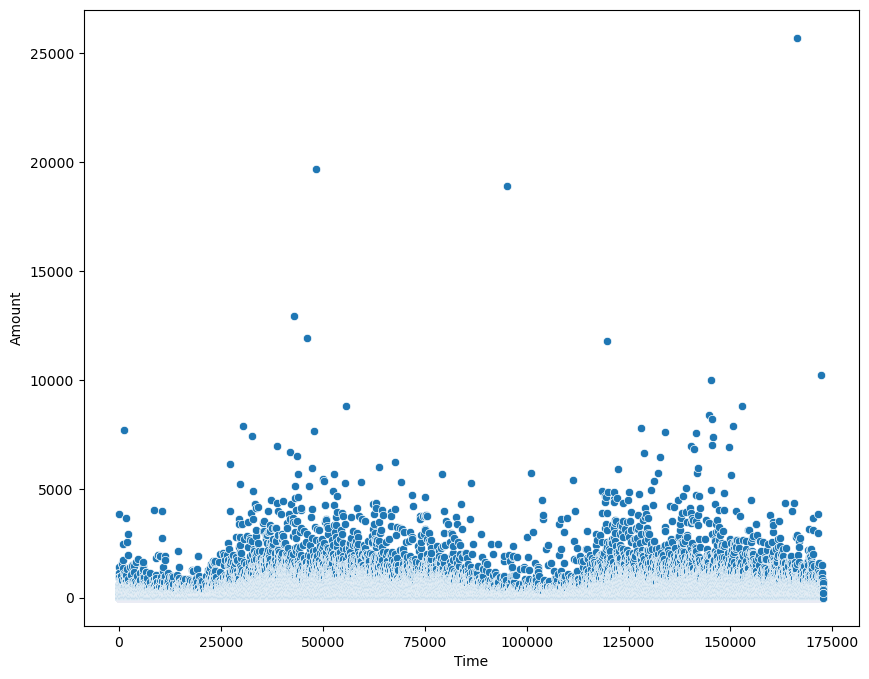

In [39]:
# Create a scatter plot of transaction amounts vs. time
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Time', y='Amount')
plt.show()

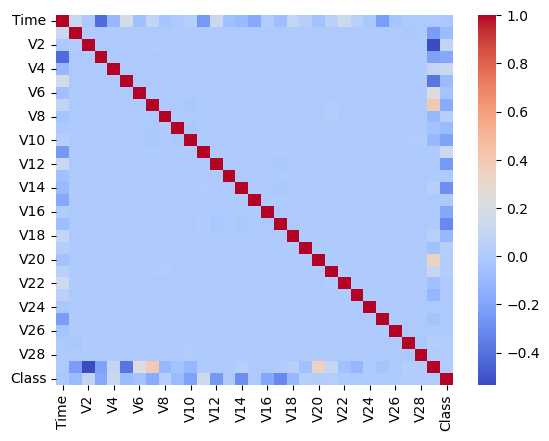

In [40]:
# Calculate correlation coefficients between all columns
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

In [41]:
#### Independent and Dependent Features
X=df.drop("Class",axis=1)
y=df.Class

## Sklearn Library installing

In [42]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [44]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75)

In [46]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

/Users/shubhangisingh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shubhangisingh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/shubhangisingh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shubhangisingh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [47]:
y_pred=clf.predict(X_test)

In [48]:
import seaborn as sns

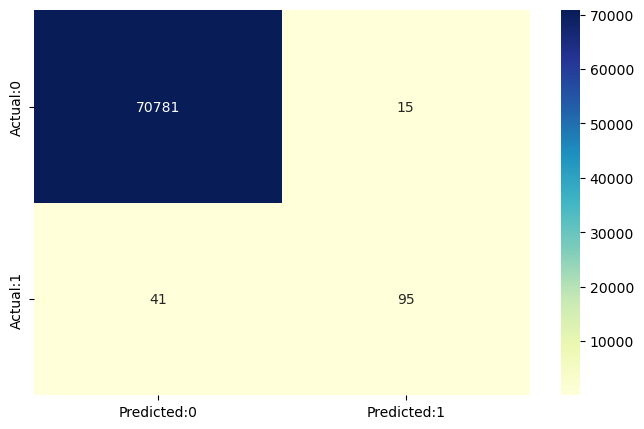

In [49]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [50]:
print(accuracy_score(y_test,y_pred))

0.9992105114757797


In [51]:


print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70796
           1       0.86      0.70      0.77       136

    accuracy                           1.00     70932
   macro avg       0.93      0.85      0.89     70932
weighted avg       1.00      1.00      1.00     70932



In [52]:
2*0.69*0.72/(0.72+0.69)

0.7046808510638298



## Random Forest Classifier :

In [53]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=1)
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5)

In [54]:
y_pred=classifier.predict(X_test)

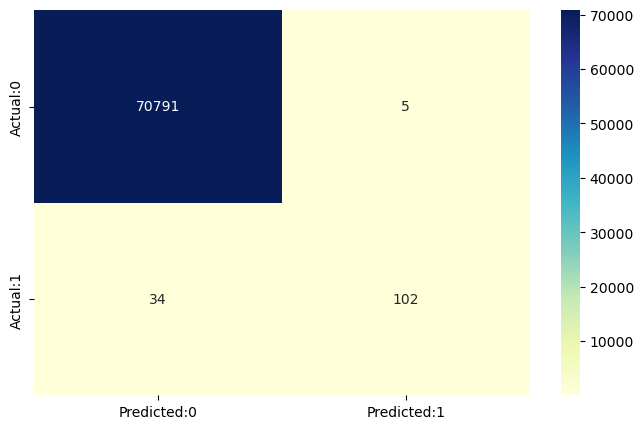

In [55]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [56]:
print(accuracy_score(y_test,y_pred))

0.999450177634918


In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70796
           1       0.95      0.75      0.84       136

    accuracy                           1.00     70932
   macro avg       0.98      0.87      0.92     70932
weighted avg       1.00      1.00      1.00     70932



### Importing imblearn library for performing under sampling :

In [58]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


## Performing Under Sampling : NearMiss

Near Miss refers to a collection of undersampling methods that select examples based on the distance of majority class examples to minority class examples.

`NearMiss-1`: Majority class examples with minimum average distance to three closest minority class examples.

`NearMiss-2`: Majority class examples with minimum average distance to three furthest minority class examples.

`NearMiss-3`: Majority class examples with minimum distance to each minority class example.

In [67]:

from collections import Counter
Counter(y_train)

Counter({0: 212457, 1: 337})

In [63]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(version=1, n_neighbors=3)
X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 212457, 1: 337})
The number of classes after fit Counter({0: 337, 1: 337})


In [64]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
print(accuracy_score(y_test,y_pred))

In [ ]:
print(classification_report(y_test,y_pred))

## CatBoost : Overfit Detector

In [72]:
pip install catboost

  Using cached catboost-1.2.tar.gz (95.9 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for catboost (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.9-x86_64-cpython-310
      creating build/lib.macosx-10.9-x86_64-cpython-310/catboost
      copying catboost/monoforest.py -> build/lib.macosx-10.9-x86_64-cpython-310/catboost
      copying catboost/plot_helpers.py -> build/lib.macosx-10.9-x86_64-cpython-310/catboost
      copying catboost/metrics.py -> build/lib.macosx-10.9-x86_64-cpython-310/catboost
      copying catboost/version.py -> build/lib.macosx-10.9-x86_64-cpython-310/catboost
      copying catboost/text_processin

In [70]:
# map categorical features
credit_catboost_ready_df = df.dropna() 

features = [feat for feat in list(credit_catboost_ready_df) if feat != 'Class']
print(features)
card_categories = np.where(credit_catboost_ready_df[features].dtypes != np.float)[0]
card_categories

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


/var/folders/9l/h8_psj7x3k142188tskm23lc0000gn/T/ipykernel_7868/802640.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  card_categories = np.where(credit_catboost_ready_df[features].dtypes != np.float)[0]


array([], dtype=int64)

In [71]:
SEED = 1234

from catboost import CatBoostClassifier 


params = {'iterations':5000,
        'learning_rate':0.01,
        'cat_features':card_categories,
        'depth':3,
        'eval_metric':'AUC',
        'verbose':200,
        'od_type':"Iter", # overfit detector
        'od_wait':500, # most recent best iteration to wait before stopping
        'random_seed': SEED
          }

cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train,   
          eval_set=(X_test, y_test), 
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True  
         );



ModuleNotFoundError: No module named 'catboost'

## AdaBoost Classifier:

In [ ]:
RANDOM_STATE = 2018
NUM_ESTIMATORS = 100
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)

In [ ]:
clf.fit(df[predictors],df['Class'].values)

In [ ]:
y_pred = clf.predict(df[predictors])

In [ ]:
cm = pd.crosstab(df[target].values, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=8)
plt.show()

### Installing matplotlib for plotting graph

In [ ]:
pip install seaborn

In [ ]:
# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = cat_model.predict(X_test)

In [ ]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

## SMOTE Analysis

In [ ]:
pip install imblearn

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
os=SMOTETomek(random_state=42)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
print(accuracy_score(y_test,y_pred))

In [ ]:
print(classification_report(y_test,y_pred))